In [1]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime
import pandas as pd

# Settings

In [2]:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

## Read data

In [3]:
data_dir='/Volumes/HD/Climatologias/EN.4.2.2.g10/NC/'

files = []
for iy in range(1950,2024):
    for im in range(1,13):
        files.append(data_dir+"EN.4.2.2.f.analysis.g10.%04d%02d.nc"%(iy,im))

In [4]:
DC = xr.open_mfdataset(files)

In [5]:
EN = DC.drop_vars("temperature_uncertainty").drop_vars("salinity_uncertainty")
data = EN.drop_vars("temperature_observation_weights").drop_vars("salinity_observation_weights")

In [6]:
data

<xarray.Dataset> Size: 37GB
Dimensions:      (depth: 42, lat: 173, lon: 360, time: 888, bnds: 2)
Coordinates:
  * depth        (depth) float32 168B 5.022 15.08 25.16 ... 5.051e+03 5.35e+03
  * lat          (lat) float32 692B -83.0 -82.0 -81.0 -80.0 ... 87.0 88.0 89.0
  * lon          (lon) float32 1kB 1.0 2.0 3.0 4.0 ... 357.0 358.0 359.0 360.0
  * time         (time) datetime64[ns] 7kB 1950-01-16T12:00:00 ... 2023-12-16...
Dimensions without coordinates: bnds
Data variables:
    temperature  (time, depth, lat, lon) float64 19GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
    salinity     (time, depth, lat, lon) float64 19GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
    time_bnds    (time, bnds) datetime64[ns] 14kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    depth_bnds   (time, depth, bnds) float32 298kB dask.array<chunksize=(1, 42, 2), meta=np.ndarray>
Attributes: (12/22)
    Conventions:            CF-1.0
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             Website and paper: https://www.metoffice.gov.uk/h...
    institution:            UK Met Office
    contact:                Rachel Killick - rachel.killick@metoffice.gov.uk
    ...                     ...
    southernmost_latitude:  -90.5
    northernmost_latitude:  89.5
    westernmost_longitude:  0.5
    easternmost_longitude:  362.5
    file_quality_index:     0
    licence:                EN4 is distributed under the Non Commercial Gover...

In [7]:
loni=-70+360
lonf=-23+360

## Extract data

In [8]:
data2=data.interp(lat=[24.5], method="linear").squeeze('lat').drop_vars('lat')

In [9]:
data3=data2.interp(lon=np.arange(loni,lonf,0.5))

In [10]:
data2.lon

<xarray.DataArray 'lon' (lon: 360)> Size: 1kB
array([  1.,   2.,   3., ..., 358., 359., 360.], dtype=float32)
Coordinates:
  * lon      (lon) float32 1kB 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
Attributes:
    long_name:      longitude
    units:          degrees_east
    standard_name:  longitude

In [11]:
data24N = data.interp(lat=[24.5], method="nearest").interp(lon=np.arange(loni,lonf,0.5), method="linear").squeeze('lat').drop_vars('lat')

In [12]:
data24N_2000 = data24N.interp(depth = np.arange(10,1900,10), method="linear")

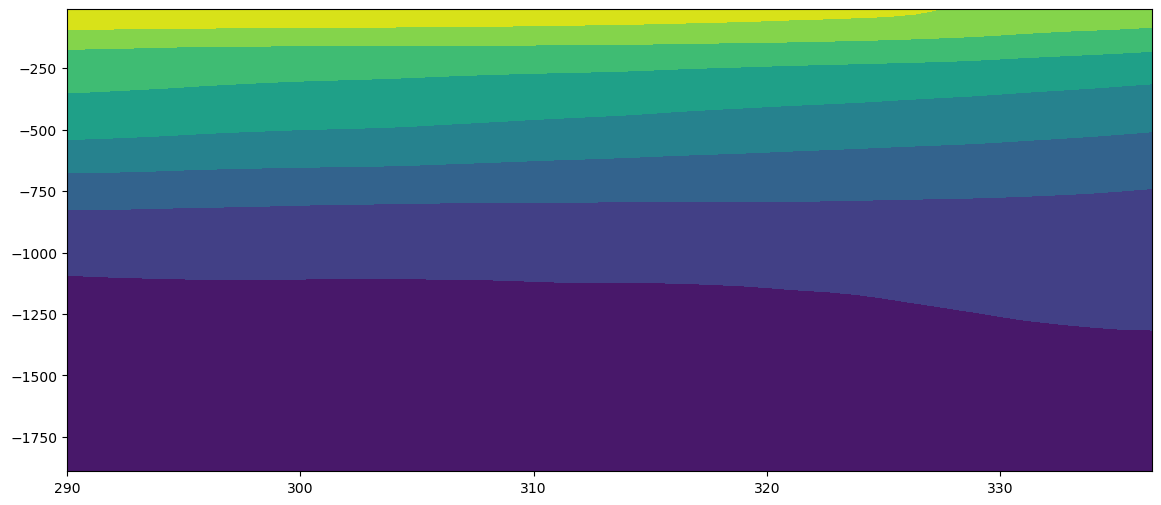

In [13]:
ig, ax = plt.subplots(figsize = (14,6))
ax.contourf(data24N_2000.temperature.lon,-data24N_2000.temperature.depth,data24N_2000.temperature.mean('time'))

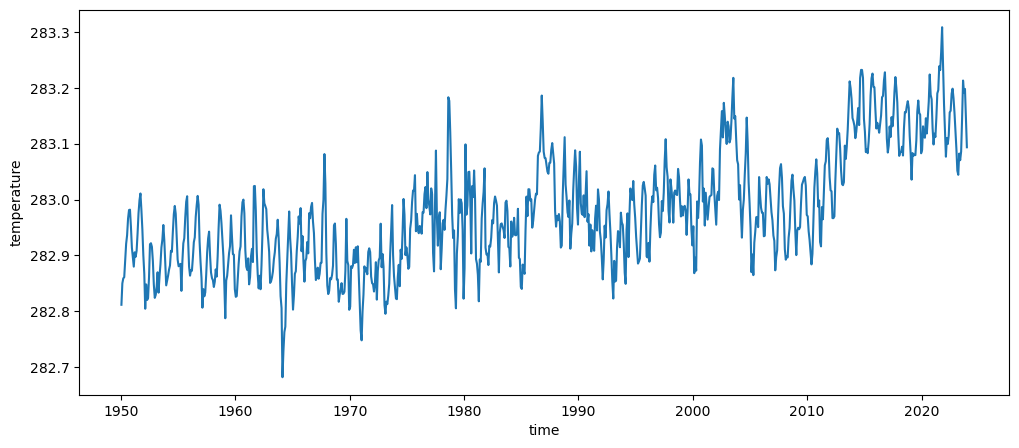

In [14]:
data24N_2000.temperature.mean('depth').mean('lon').plot()

In [15]:
data24N.to_netcdf('./Data/EN422g10_interp_24N.nc')